In [1]:
class LRGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """

    def __init__(self, eta=0.05, n_iter=100, batchSize = 16, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.batch_size = batchSize

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        self.rgen = np.random.RandomState(self.random_state)
        self.w1_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.w2_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.w3_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost1_ = []
        self.cost2_ = []
        self.cost3_ = []
        trainX, trainY = self.batch_shuffle(X, y, self.batch_size)

        for i in range(self.n_iter):
            net_input = self.net_input(X, self.w1_)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,
            # in the case of logistic regression (as we will see later),
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors1 = (y[:, 0] - output)
            self.w1_[1:] += self.eta * X.T.dot(errors1)
            self.w1_[0] += self.eta * errors1.sum()
            cost1 = -y[:,0].dot(np.log(output)) - ((1 - y[:,0]).dot(np.log(1 - output)))
            self.cost1_.append(cost1)

        for i in range(self.n_iter):
            net_input2 = self.net_input(X, self.w2_)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,
            # in the case of logistic regression (as we will see later),
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output2 = self.activation(net_input2)
            errors2 = (y[:, 1] - output2)
            self.w2_[1:] += self.eta * X.T.dot(errors2)
            self.w2_[0] += self.eta * errors2.sum()
            cost2 = -y[:,1].dot(np.log(output)) - ((1 - y[:,1]).dot(np.log(1 - output)))
            self.cost2_.append(cost2)

        for i in range(self.n_iter):
            net_input3 = self.net_input(X, self.w3_)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,
            # in the case of logistic regression (as we will see later),
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output3 = self.activation(net_input3)
            errors3 = (y[:, 2] - output3)
            self.w3_[1:] += self.eta * X.T.dot(errors3)
            self.w3_[0] += self.eta * errors3.sum()
            cost3 = -y[:,2].dot(np.log(output)) - ((1 - y[:,2]).dot(np.log(1 - output)))
            self.cost3_.append(cost3)

        self.w_ = [self.w1_, self.w2_, self.w3_]
        return self

    def batch_shuffle(self, X, y, batchSize):
        """shuffle training data"""
        r = self.rgen.permutation(len(y))
        temp_x = X[r]
        temp_y = y[r]
        return temp_x[:batchSize], temp_y[:batchSize]
    
    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def net_input(self, X, weights):
        """Calculate net input"""
        return np.dot(X, weights[1:]) + weights[0]

    def predict(self, X):
        esti = []
        esti1 = self.activation(self.net_input(X, self.w1_))
        esti2 = self.activation(self.net_input(X, self.w2_))
        esti3 = self.activation(self.net_input(X, self.w3_))
        for nums in range(len(esti1)):
            esti.append(np.argmax([esti1[nums], esti2[nums], esti3[nums]]))
        return np.array(esti)

In [7]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
    if test_idx:
        #plot all samples
        x_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(x_test[:,0],
                    x_test[:,1],
                    c='',
                    edgecolor='black',
                    alpha = 1.0,
                    linewidth=1,
                    marker ='o',
                    s = 100,
                    label='test set')
        
        
        

In [6]:
plt.show()

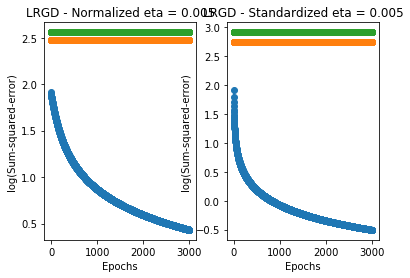

Test set(norm) Accuracy: 0.97
Train Set(norm) Accuracy: 0.93


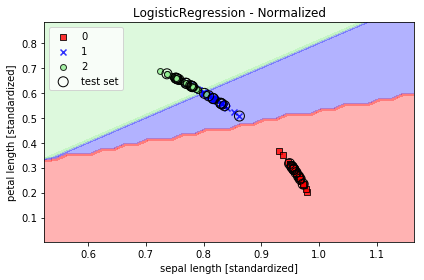

Test set(std) Accuracy: 0.97
Train Set(std) Accuracy: 0.95


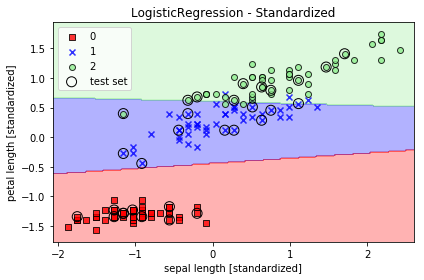

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
#from adalines import adaline
#from plot_decision_regions import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize


#this is the data from pandas
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

#x is the features for the classification
#y is the flower catergory names or the correct answers.
x = df.iloc[:, [0,2]].values
y = df.iloc[:,4]

#turn y into a new 3XN array to prepare for OvR
#oneHotEncoded is in this order: iris-setosa, iris-versicolor, iris-virginica
from sklearn. preprocessing import LabelEncoder, OneHotEncoder
labelEncoded = LabelEncoder().fit_transform(y).reshape(-1,1)
oneHotEncoded = OneHotEncoder().fit_transform(labelEncoded).toarray()

#lets make train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, oneHotEncoded, test_size=0.2, random_state=1, stratify=y)

y_set_train = []
y_set_test = []
for ints in range(y_train.shape[0]):
    y_set_train.append(np.argmax(y_train[ints,:]))

for ints in range(y_test.shape[0]):
    y_set_test.append(np.argmax(y_test[ints,:]))


#This is for the feature scaling
# standardize featuress

so = StandardScaler()
so.fit(x_train)
x_train_std = so.transform(x_train)
x_test_std = so.transform(x_test)

#normalize
x_train_norm = normalize(x_train)
x_test_norm = normalize(x_test)


IrisLR = LRGD()

#standarizing using numpy
X_std = np.copy(x)
X_std[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
X_std[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

#combining test and train sets for plotting decision boundary
X_combined_std = np.vstack((x_train_std, x_test_std))
X_combined_norm = np.vstack((x_train_norm, x_test_norm))
y_combined = np.hstack((y_set_train, y_set_test))

fig, ax = plt.subplots(nrows=1, ncols=2)

#train data is normalized 
ada1 = LRGD(n_iter=3000, eta=0.005).fit(x_train_norm, y_train)
ax[0].plot(range(1, len(ada1.cost1_) + 1), np.log10(ada1.cost1_), marker='o')
ax[0].plot(range(1, len(ada1.cost1_) + 1), np.log10(ada1.cost2_), marker='o')
ax[0].plot(range(1, len(ada1.cost1_) + 1), np.log10(ada1.cost3_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('LRGD - Normalized eta = 0.005')

#train data is standardized
ada2 = LRGD(n_iter=3000, eta = 0.005).fit(x_train_std, y_train)
ax[1].plot(range(1, len(ada2.cost1_) + 1), np.log10(ada2.cost1_), marker='o')
ax[1].plot(range(1, len(ada2.cost1_) + 1), np.log10(ada2.cost2_), marker='o')
ax[1].plot(range(1, len(ada2.cost1_) + 1), np.log10(ada2.cost3_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('LRGD - Standardized eta = 0.005')
plt.show()

plot_decision_regions(X=X_combined_norm, y=y_combined, classifier=ada1, test_idx=range(120,150))
plt.title('LogisticRegression - Normalized')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
y_predict = ada1.predict(x_test_norm)
print('Test set(norm) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = ada1.predict(x_train_norm)
print('Train Set(norm) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))


plt.show()


plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ada2, test_idx=range(120,150))
plt.title('LogisticRegression - Standardized')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
y_predict = ada2.predict(x_test_std)
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = ada2.predict(x_train_std)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))


plt.show()

Logistic regression performed very well for accurately classifying the data even though the code was genearted mannually. Based on the error rate, the classification seemed to be based on one factor. The errors rate remains the same for two features, while gradually decreasing for one features, suggesting one feature is very predictable, whereas the other two are not. 

Test set(std) Accuracy: 0.87
Train set(std) Accuracy: 0.95


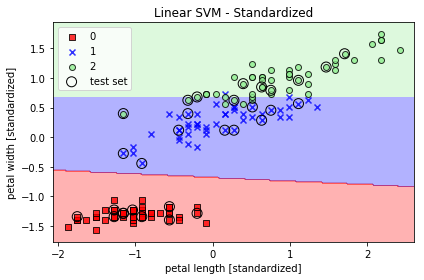

Test Set(norm) Accuracy: 0.97
Train Set(norm) Accuracy: 0.93


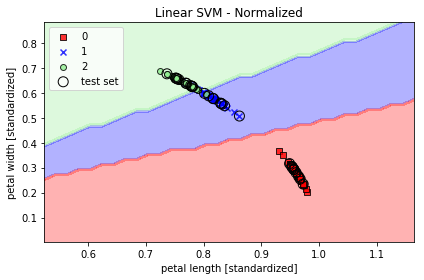

In [16]:
from sklearn.svm import SVC


#This is for the feature scaling
# standardize featuress
so = StandardScaler()
so.fit(x_train)
x_train_std = so.transform(x_train)
x_test_std = so.transform(x_test)

#normalize
x_train_norm = normalize(x_train)
x_test_norm = normalize(x_test)

#fit data to SVM
svm = SVC(kernel='linear', C=1.0, random_state=1).fit(x_train_std, y_set_train)
svm2 = SVC(kernel='linear', C=1.0, random_state=1).fit(x_train_norm, y_set_train)

#get the prediction score for SVM.std
y_predict_std = svm.predict(x_test_std)
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict_std))
y_predict_std = []
y_predict_std = svm.predict(x_train_std)
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict_std))



#plot the decision boundary for SVM.std
plot_decision_regions(X_combined_std, 
                      y_combined, 
                      classifier=svm, 
                      test_idx=range(120, 150))
plt.title('Linear SVM - Standardized')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#get accuaracy for SVM.norm
y_pred_norm = svm2.predict(x_test_norm)
print('Test Set(norm) Accuracy: %.2f' % accuracy_score(y_set_test, y_pred_norm))

y_pred_norm = svm2.predict(x_train_norm)
print('Train Set(norm) Accuracy: %.2f' % accuracy_score(y_set_train, y_pred_norm))

#plt.savefig('images/03_11.png', dpi=300)

#plot for SVM.norm
plot_decision_regions(X_combined_norm, 
                      y_combined, 
                      classifier=svm2, 
                      test_idx=range(120, 150))
plt.title('Linear SVM - Normalized')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#plt.show()

In [9]:
plt.show()

Test Set(std) Accuracy: 0.67
Train Set(std) Accuracy: 0.33


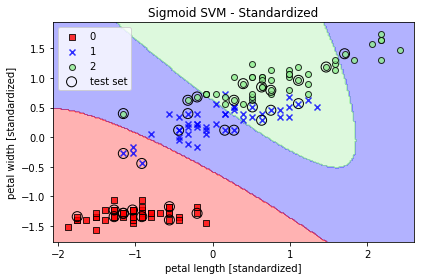

Test Set(std) Accuracy: 0.97
Train Set(std) Accuracy: 0.93


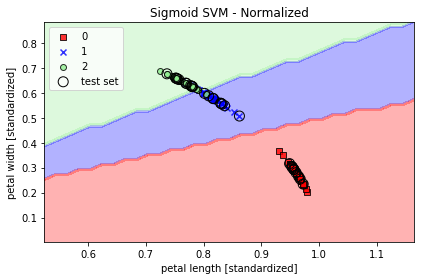

In [26]:
from sklearn.svm import SVC
svms = SVC(kernel='sigmoid', C=1.0, random_state=1)
svms.fit(x_train_std, y_set_train)

svms2 = SVC(kernel='sigmoid', C=1.0, random_state=1)
svms2.fit(x_train_norm, y_set_train)
#get the prediction score
y_predict_std = svms.predict(x_test_std)
print('Test Set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict_std))

y_pred_std = svms.predict(x_train_norm)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_pred_std))


#plot the decision boundary
plot_decision_regions(X_combined_std, 
                      y_combined, 
                      classifier=svms, 
                      test_idx=range(120, 150))
plt.title('Sigmoid SVM - Standardized')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
#get the prediction score
y_predict_norm = svms2.predict(x_test_norm)
print('Test Set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict_norm))

y_pred_norm = svms2.predict(x_train_norm)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_pred_norm))


#plot the decision boundary
plot_decision_regions(X_combined_norm, 
                      y_combined, 
                      classifier=svms2, 
                      test_idx=range(120, 150))
plt.title('Sigmoid SVM - Normalized')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

#plt.savefig('images/03_11.png', dpi=300)
plt.show()

Overall SVMs, whether it is linear or nonlinear, showed the worst performance of all the classifiers. Especailly, the nonlinear (sigmoid) SVM showed 33% accuracy for the training data. This results seemed to be the shape of the data, as the data can be separated efficiently with lines. 

Test Set(std) Accuracy: 0.97
Train Set(std) Accuracy: 0.99


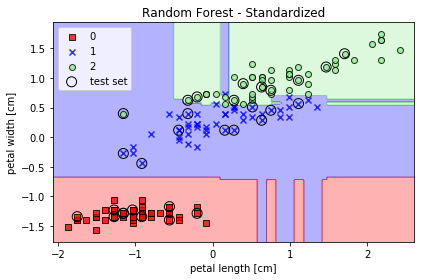

Test Set(std) Accuracy: 0.97
Train Set(std) Accuracy: 0.97


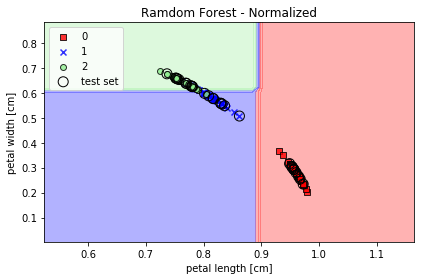

In [25]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', 
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)

forest2 = RandomForestClassifier(criterion='gini', 
                                n_estimators=25, 
                                random_state=1, 
                                n_jobs=2)

#fit data to random forest
forest.fit(x_train_std, y_set_train)
forest2.fit(x_train_norm, y_set_train)

#get the prediction score
y_predict_std = forest.predict(x_test_std)
print('Test Set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict_std))

y_pred_std = forest.predict(x_train_std)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_pred_std))


#plot the decision boundary

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=forest, test_idx=range(120, 150))
plt.title('Random Forest - Standardized')
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#get the prediction score
y_predict_std = forest2.predict(x_test_norm)
print('Test Set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict_std))

y_pred_std = forest2.predict(x_train_norm)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_pred_std))



plot_decision_regions(X_combined_norm, y_combined, 
                      classifier=forest2, test_idx=range(120, 150))
plt.title('Ramdom Forest - Normalized')
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
#plt.savefig('images/03_22.png', dpi=300)
#plt.show()

The performance of the random forest for both standardized data set and normalized data set were equal for the test data. Cost function was not drawn as it is not applicable. The decision boundary of the normalized data set seemed to be more efficient, as the whole decision space is only separated with three lines.

Test Set(std) Accuracy: 0.97
Train Set(std) Accuracy: 0.95


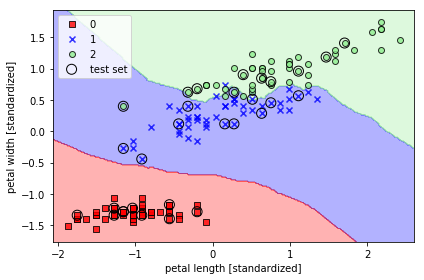

Test Set(std) Accuracy: 0.97
Train Set(std) Accuracy: 0.94


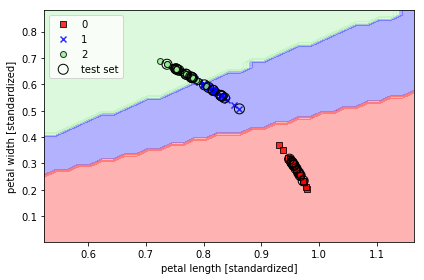

The performance of the normalized data and the standardized data  are the same for the test data, and very similar for the training data.  cost function was not drawn as it is not applicable in this situation.  Interestingly, the green and the blue data were separated with wave-like  boundaries, unlike other classification algorithm.


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')

knn2 = KNeighborsClassifier(n_neighbors=5,
                            p=2, 
                           metric='minkowski')
#fit data to KNN
knn.fit(x_train_std, y_set_train)
knn2.fit(x_train_norm, y_set_train)

#get the prediction score
y_predict_std = knn.predict(x_test_std)
print('Test Set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict_std))

y_pred_std = knn.predict(x_train_std)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_pred_std))


#plot the decision boundary
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(120, 150))
plt.title('5 NearestNeighbor - Standardized')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#get the prediction score
y_predict_std = knn2.predict(x_test_norm)
print('Test Set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict_std))

y_pred_std = knn2.predict(x_train_norm)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_pred_std))


#plot the decision boundary
plot_decision_regions(X_combined_norm, y_combined, 
                      classifier=knn2, test_idx=range(120, 150))
plt.title('5 NearestNeighbor - Noramlized')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#plt.savefig('images/03_24.png', dpi=300)
#plt.show()
#plt.savefig('images/03_24.png', dpi=300)
#plt.show()

The performance of the normalized data and the standardized data are the same for the test data, and very similar for the training data.
cost function was not drawn as it is not applicable in this situation.Interestingly, the green and the blue data were separated with wave-like boundaries, unlike other classification algorithm.

Accuracy: 0.97


[2, 0, 1]

[1 0 2 0 2 0 2 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 0 0 2 2 0 0 1 1]
[2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1, 1]
Accuracy: 0.73
